# 感知机

* 感知机（perceptron）是二类分类的线性分类模型，其输入为实例的特征向量，输出为实例的类别，取+1和-1二值
* 感知机对应于输入空间（特征空间）中将实例划分为正负两类的分离超平面，属于判别模型
* 感知机1957年由Rosenblatt提出，是神经网络与支持向量机的基础

* 感知机学习旨在求出将训练数据进行线性划分的分离超平面
* 为此，导入基于误分类的损失函数，利用梯度下降法对损失函数进行极小化，求得感知机模型

课堂提问\_1：梯度 / gradient

## 感知机模型

* 输入空间（特征空间）是$\mathcal{X}\subseteq\mathbf{R}^n$。输入$x\in\mathcal{X}$对应于输入空间（特征空间）的点
* 输出空间是$\mathcal{Y}=\{+1,-1\}$。输出$y\in\mathcal{Y}$表示实例的类别

$$
f(x)=\mathrm{sign}(w\cdot x+b)
$$

* $w\in\mathbf{R}^n$叫作权值向量（weight vector）
* $b\in\mathbf{R}$叫作偏置（bias）

## 感知机模型的假设空间

函数集合
$$
\{f\mid f(x)=w\cdot x+b\}
$$

## 几何解释

* 线性方程$w\cdot x+b=0$
对应于特征空间$\mathbf{R}^n$中的一个超平面$S$
* 这个超平面将特征空间划分为两个部分
* 位于两部分的点（特征向量）分 
别被分为正、负两类

超平面$S$称为分离超平面（separating hyperplane）

* 课堂提问\_2：图2.1中$w\cdot x+b=0$的具体形式，若考虑过点$(0,1)$及$(1,0)$
* 课堂提问\_3：超平面的法向量、超平面的截距
* 课堂提问\_4：图2.1中$-\tfrac{b}{\|w\|}$
* 课堂提问\_5：输入空间$\mathbf{R}^n$中任一点$x_0$到超平面$S$的距离：
$$
\frac{1}{\|w\|}|w\cdot x_0+b|
$$

## 数据集的线性可分性

* 给定一个数据集
$$T=\{(x_1,y_1),(x_2,y_2),\dots,(x_N,y_N)\}$$
* 如果存在某个超平面$S$
$$
w\cdot x+b=0
$$
能够将数据集的正实例点和负实例点完全正确地划分到超平面的两侧
* 数据集$T$为线性可分数据集（linearly separable data set）

## 感知机学习策略

* 为了找出这样的超平面，即确定感知机模型参数$w,b$，需要确定一个学习策略，即定义（经验）损失函数并将损失函数极小化

## 感知机学习策略

* 损失函数的一个自然选择是误分类点的总数。但是，这样的损失函数不是参数$w,b$的连续可导函数，不易优化
* 损失函数的另一个选择是误分类点到超平面$S$的总距离，这是感知机所采用的

## 感知机学习策略

* 误分类点$x_i$到超平面$S$的距离是
$$
-\frac{1}{\|w\|}y_i(w\cdot x_i+b)
$$

课堂提问\_6：从$|w\cdot x_0+b|$到$-y_i(w\cdot x_i+b)$


## 感知机学习策略

* 假设超平面$S$的误分类点集合为$M$，那么所有误分类点到超平面$S$的总距离为
$$
-\frac{1}{\|w\|}\sum_{x_i\in M}y_i(w\cdot x_i+b)
$$

## 感知机学习策略

* 感知机$\mathrm{sign}(w\cdot x+b)$学习的损失函数定义为
$$
L(w,b)=-\sum_{x_i\in M}y_i(w\cdot x_i+b)
$$
* 显然，损失函数$L(w,b)$是非负的

课堂提问\_7：非负的

## 感知机学习算法

* 感知机学习算法是误分类驱动的
* 具体采用随机梯度下降法（stochastic gradient descent）

## 感知机学习算法

* 首先，任意选取一个超平面$w_0,b_0$
* 然后用梯度下降法不断地极小化目标函数
* 极小化过程中不是一次使$M$中所有误分类点的梯度下降，而是一次随机选取一个误分类点使其梯度下降

课堂提问\_8：stochastic gradient descent中的stochastic

## 感知机学习算法

* 假设误分类点集合$M$是固定的，那么损失函数$L(w,b)$的梯度由
$$
\begin{aligned}
\nabla_wL(w,b)&=-\sum_{x_i\in M}y_ix_i\\
\nabla_bL(w,b)&=-\sum_{x_i\in M}y_i
\end{aligned}
$$
给出

课堂提问\_9：上述形式为什么

## 感知机学习算法

* 随机选取一个误分类点$(x_i,y_i)$，对$w,b$进行更新：
$$
\begin{aligned}
w&\gets w+\eta y_ix_i\\
b&\gets b+\eta y_i
\end{aligned}
$$

$\eta$ 称为学习率（learning rate）

## 感知机学习算法

1. 选取初值$w_0,b_0$
1. 在训练集中选取数据$(x_i,y_i)$
1. 如果$y_i(w\cdot x_i+b)\le 0$
$$
\begin{aligned}
w&\gets w+\eta y_ix_i\\
b&\gets b+\eta y_i
\end{aligned}
$$
4. 转至2，直至训练集中没有误分类点

## 实例

* 训练数据集
* 正实例点是$x_1=(3,3)^T$，$x_2=(4,3)^T$
* 负实例点是$x_3=(1,1)^T$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def scatter_points():
    x_1 = np.asarray([3, 4, 1], dtype=np.float32)
    x_2 = np.asarray([3, 3, 1], dtype=np.float32)

    # use set_position
    ax = plt.gca()  # Get the current Axes instance
    ax.spines["top"].set_color("none")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["bottom"].set_position("zero")

    plt.axis("scaled")

    plt.scatter(x_1[:2], x_2[:2], label="0", facecolors="none", edgecolors="y")
    plt.scatter(x_1[2:], x_2[2:], label="1", marker="x", facecolors="g")
    plt.xlabel(r"$x^{(1)}$")
    plt.ylabel(r"$x^{(2)}$")
    plt.xlim(-2, 7)
    plt.ylim(-2, 7)

    plt.xticks(np.arange(-2, 8, 1))

    plt.legend()

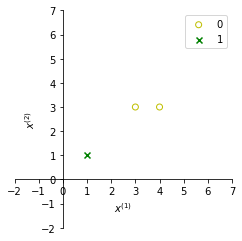

In [3]:
scatter_points()

## Perceptron

In [4]:
X = np.asarray([[3, 3], [4, 3], [1, 1]], dtype=np.float32)
y = np.asarray([1, 1, -1], dtype=np.int32)

In [5]:
# 数据线性可分、二分类数据
class Model:
    def __init__(self):
        self.w = np.zeros(2, dtype=np.float32)
        self.b = 0
        self.l_rate = 1

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y

    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return "Perceptron Model!"

In [6]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model!'

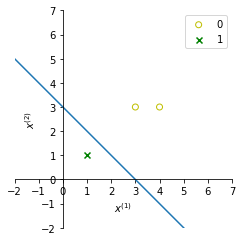

In [7]:
x_points = np.linspace(-2, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_)

scatter_points()

## 感知机学习算法的对偶形式

* 不失一般性，可假设初始值$w_0,b_0$均为0
* 逐步修改$w,b$，设修改$n$次，则$w,b$关于$(x_i,y_i)$的增量分别是$\alpha_iy_ix_i$和$\alpha_iy_i$，这里$\alpha_i=n_i\eta$

## 感知机学习算法的对偶形式

**怎样理解**

* $n$次为总数
* 

$$\sum_{1\le i\le N}n_i=n$$
其中$N$为训练集中的实例点的个数

## 感知机学习算法的对偶形式

* 最后学习到的$w,b$可以分别表示为
$$
\begin{aligned}
w&=\sum_{i=1}^N\alpha_iy_ix_i\\
b&=\sum_{i=1}^N\alpha_iy_i
\end{aligned}
$$

* 从这个角度，求解$\alpha=(\alpha_1,\alpha_2,\dotsc,\alpha_N)^T$即可

## 感知机学习算法的对偶形式

* Reminder $\alpha_i=n_i\eta$
* 关注点为$n_i$

## 感知机学习算法的对偶形式

* 什么时候$n_i$ increments
* 当$y_i(w\cdot x_i+b)\le 0$
* 而
$$
w=\sum_{i=1}^N\alpha_iy_ix_i
$$
* 有：
$$
y_i\biggl[\Bigl(\sum_{j=1}^N\alpha_jy_jx_j\Bigr)\cdot x_i+b\biggr]\le 0
$$

## 感知机学习算法的对偶形式

* 简化
$$
\Bigl(\sum_{j=1}^N\alpha_jy_jx_j\Bigr)\cdot x_i=\sum_{j=1}^N\alpha_jy_j(x_j\cdot x_i)
$$
* Gram matrix
$$
G=[x_i\cdot x_j]_{N\times N}
$$